예제 4.2 MLP MNIST

In [ ]:
# 예제 4.2 MLP MNIST

#셋업
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터셋 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)  # 학습 데이터 shape 확인
print(x_test.shape, y_test.shape)    # 테스트 데이터 shape 확인

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


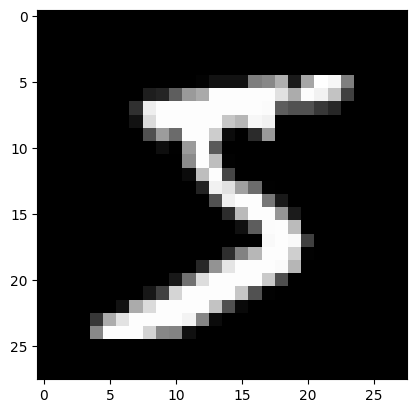

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

In [ ]:
# 첫 번째 학습 데이터(28x28) 확인
plt.imshow(x_train[0], cmap='gray')   # 이미지 확인
plt.show()

for i in range(28):
    for j in range(28):
        print(f"{x_train[0][i, j]:4d}", end='')   # 픽셀 값 확인

    print()

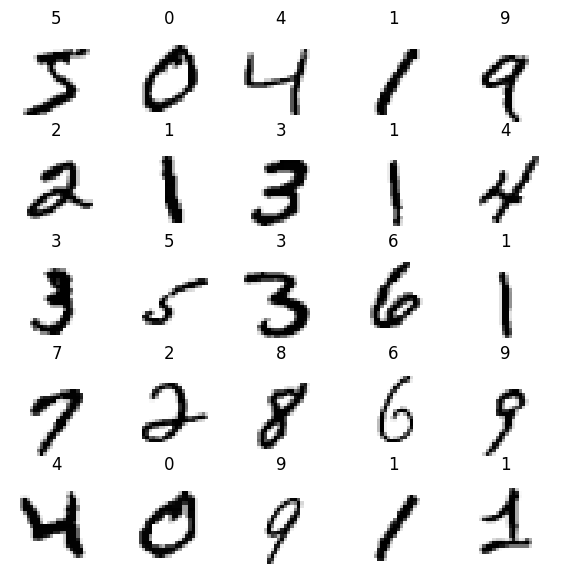

In [ ]:
# 학습 데이터 시각화
plt.figure(figsize=(7, 7))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray_r')   # 그레이 레벨 반전
    plt.title(y_train[i])   # 레이블
    plt.axis('off')

plt.show()

In [ ]:
# 학습 데이터/검증 데이터 분할
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train,
    test_size=0.2,   # 분할 비율 0.2
    random_state=77)

print(x_train.shape, y_train.shape)   # 학습 데이터 shape 확인
print(x_valid.shape, y_valid.shape)   # 검증 데이터 shape 확인

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


In [ ]:
# 데이터 정규화
x_train = x_train / 255.   # 최소값 0, 최대값 255
x_valid = x_valid / 255.
x_test = x_test / 255.

In [ ]:
# 모델 생성
model = Sequential([
    Flatten(input_shape=(28, 28)),   # 2차원 이미지를 1차원 벡터로 변환
    Dense(128, kernel_initializer=RandomNormal(seed=77),   # 뉴런 128개
          activation='relu', name='Hidden_Layer1'),
    Dense(64, kernel_initializer=RandomNormal(seed=77),    # 뉴런 64개
          activation='relu', name='Hidden_Layer2'),
    Dense(10, kernel_initializer=RandomNormal(seed=77),    # 뉴런 10개
          activation='softmax',           # 출력층 활성화 함수 softmax
          name='Output_Layer')
])

In [ ]:
# 모델 구조 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Hidden_Layer1 (Dense)       (None, 128)               100480    
                                                                 
 Hidden_Layer2 (Dense)       (None, 64)                8256      
                                                                 
 Output_Layer (Dense)        (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


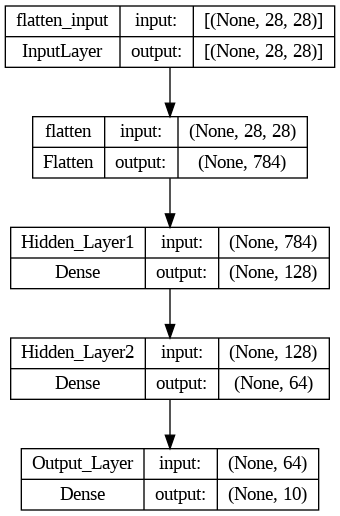

In [ ]:
# 모델 구조
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])   # 성능 평가 지표로 정확도 사용

In [ ]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_valid, y_valid))   # 성능 검증용

Epoch 1/5
1500/1500 [==============================] - 8s 4ms/step - loss: 0.3158 - accuracy: 0.9107 - val_loss: 0.1847 - val_accuracy: 0.9442
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1277 - accuracy: 0.9621 - val_loss: 0.1167 - val_accuracy: 0.9631
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0868 - accuracy: 0.9739 - val_loss: 0.1053 - val_accuracy: 0.9669
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0642 - accuracy: 0.9801 - val_loss: 0.0937 - val_accuracy: 0.9725
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0491 - accuracy: 0.9847 - val_loss: 0.0844 - val_accuracy: 0.9767


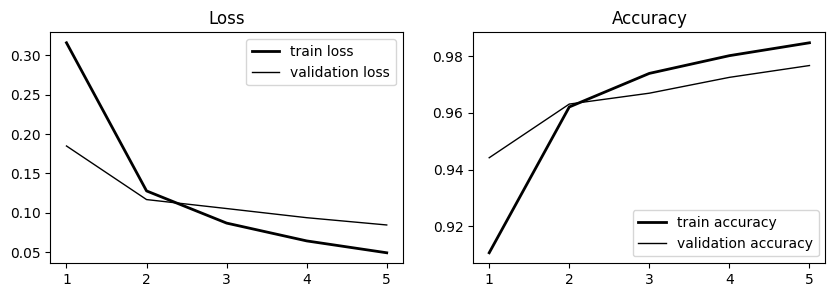

In [ ]:
# 학습 결과 시각화
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

axs[0].plot(range(1, len(history.history['loss']) + 1),
            history.history['loss'], label='train loss',
            color='black', linewidth=2)
axs[0].plot(range(1, len(history.history['val_loss']) + 1),
            history.history['val_loss'], label='validation loss',
            color='black', linewidth=1)
axs[0].set_title('Loss')
axs[0].legend(loc='best')

axs[1].plot(range(1, len(history.history['accuracy']) + 1),
            history.history['accuracy'], label='train accuracy',
            color='black', linewidth=2)
axs[1].plot(range(1, len(history.history['val_accuracy']) + 1),
            history.history['val_accuracy'], label='validation accuracy',
            color='black', linewidth=1)
axs[1].set_title('Accuracy')
axs[1].legend(loc='best')

plt.show()

In [ ]:
# 모델 평가
model.evaluate(x_test, y_test)   # 테스트 데이터로 성능 평가

313/313 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9766


[0.07956933230161667, 0.9765999913215637]

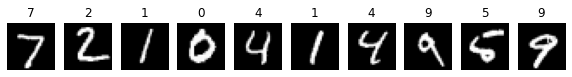

label: [7 2 1 0 4 1 4 9 5 9]


In [ ]:
# 모델 예측 결과
x = x_test[:10]
y_pred = np.argmax(model.predict(x), axis=1)

plt.figure(figsize=(10, 10))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(y_pred[i])
    plt.axis('off')

plt.show()

print(f"label: {y_test[:10]}")

In [ ]:
# 모델을 파일로 저장
model.save('mnist_mlp.h5')

In [ ]:
# 저장된 모델 로드
model = tf.keras.models.load_model('mnist_mlp.h5')